# Navigation - Report



Darren Ewaniuk


In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages. If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [9]:
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Next, we will start the environment! Before running the code cell below, change the file_name parameter to match the location of the Unity environment that you downloaded.

In [2]:
env = UnityEnvironment(file_name="/Users/homecomputer/deep-reinforcement-learning/p1_navigation/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment. At each time step, it has four actions at its disposal:


-  0 - walk forward
-  1 - walk backward
-  2 - turn left
-  3 - turn right

The state space has 37 dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction. A reward of +1 is provided for collecting a yellow banana, and a reward of -1 is provided for collecting a blue banana.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=False)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


# Import the dqn agent

The simulation contains a single agent that navigates the environment.


In [5]:
# Import and initialize DQN agent with environment variables
from dqn_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, seed=4)

# Run and train the agent

Watch as the agent's score improves as it learns about the environment. The agent will end once the trailing average score of 100 episodes is greater than 13.0.

A graph will then be diplayed of the agents scores.

Episode 100	Average Score: 5.04
Episode 200	Average Score: 11.85
Episode 300	Average Score: 12.70
Episode 324	Average Score: 13.08
Environment solved in 224 episodes!	Average Score: 13.08


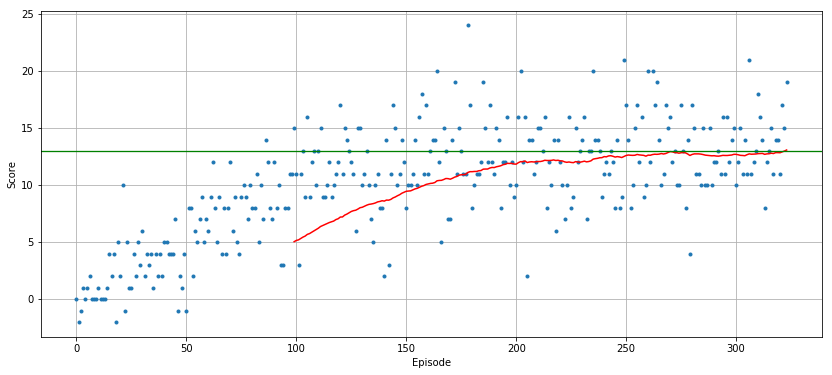

In [6]:
# Train the agent with Deep Q Learning
def dqn(n_episodes=2000, eps_start=0.25, eps_end=0.001, eps_decay=0.995, brain_name=brain_name, env=env, solve=False):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        brain_name (object): controller for environment
        env (objet): Unity ML Agent Banana collector environment
        solve (bool): Boolean to determine if learning should stop once environment is solved
        
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores ( score window )
    eps = eps_start                    # initialize epsilon for epsilon greedy
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0] # get the current state from the environment
    
       
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0] # get the current state
        score = 0
        while True:
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        # save most recent score window
        scores_window.append(score)
        # save most recent score
        scores.append(score)  
        
        # decrease epsilon
        eps = max(eps_end, eps_decay*eps) 
        
        # create output
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if solve:
            if np.mean(scores_window)>=13.0:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
                torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
                break
        else:
            if i_episode == n_episodes:
                print('\nMax episodes reached!\tFinal Average Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
                torch.save(agent.qnetwork_local.state_dict(), 'all-episodes-checkpoint.pth')
    return scores


# run agent
scores = dqn(solve=True)


# plot the scores
plt.figure(figsize=(14,6))
plt.plot(np.arange(len(scores)), scores, '.')

#create trailing average line (goal)
qx = np.array(scores)
ac = pd.DataFrame(qx)
A = ac.rolling(window=100).mean()
plt.plot(A, 'r')

#plot goal line
plt.axhline(y=13., xmin=0.0, xmax=1.0, color='g', linestyle='-', linewidth=1.3)

plt.grid()
plt.xlabel('Episode')
plt.ylabel('Score')
plt.show()




Close the environment by running the next cell. You can then change the hyperparameters and run the agent again!

In [7]:
env.close()

# Please read my report file for additional results and write-up

Thanks!

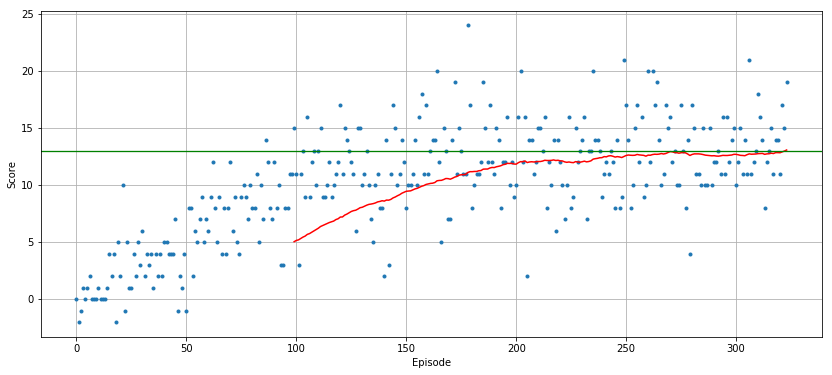

In [10]:
# plot the scores
plt.figure(figsize=(14,6))
plt.plot(np.arange(len(scores)), scores, '.')

#create trailing average line (goal)
qx = np.array(scores)
ac = pd.DataFrame(qx)
A = ac.rolling(window=100).mean()
plt.plot(A, 'r')

#plot goal line
plt.axhline(y=13., xmin=0.0, xmax=1.0, color='g', linestyle='-', linewidth=1.3)

plt.grid()
plt.xlabel('Episode')
plt.ylabel('Score')
plt.show()
